# Desafío - Estimando curvas normales

## Desafío 1. Importe un csv desde internet

In [137]:
import pandas as pd
df_sub = pd.read_csv('subsample_gc_demo.csv')

## Desafío 2. Importe su conjunto de funciones

In [138]:
import ancilliary_funcs as funcs

for column, serie in df_sub.iteritems():
    cantidad, porcentaje = funcs.observaciones_perdidas(df_sub, column)
    if cantidad == None:
        cantidad = 0
    if porcentaje == None:
        porcentaje = 0.0
    print("La columna {} tiene {} datos perdidos y corresponde a un {}".format(column, cantidad, porcentaje))

La columna Unnamed: 0 tiene 0 datos perdidos y corresponde a un 0.0
La columna undp_hdi tiene 6 datos perdidos y corresponde a un 0.061855670103092786
La columna ccodealp tiene 0 datos perdidos y corresponde a un 0.0
La columna ht_region tiene 0 datos perdidos y corresponde a un 0.0
La columna gle_cgdpc tiene 2 datos perdidos y corresponde a un 0.020618556701030927
La columna imf_pop tiene 25 datos perdidos y corresponde a un 0.25773195876288657
La columna ffp_hf tiene 13 datos perdidos y corresponde a un 0.13402061855670103
La columna wef_qes tiene 26 datos perdidos y corresponde a un 0.26804123711340205
La columna wde_expedu tiene 97 datos perdidos y corresponde a un 1.0
La columna wdi_nerds tiene 97 datos perdidos y corresponde a un 1.0
La columna Nulos tiene 0 datos perdidos y corresponde a un 0.0


## Desafío 3. Estime el puntaje Z

In [139]:
import numpy as np
var = 'gle_cgdpc'
var_dropna = df[var].dropna()
mean = var_dropna.mean()
std = np.sqrt(var_dropna.var())
df_sub['z_' + var] = (df_sub[var] - mean) / std

df_sub = df_sub.dropna(subset = ['z_gle_cgdpc'])
df_sub = df_sub.sort_values(by = ['z_gle_cgdpc'])
df_sub.head(10).describe()

,Unnamed: 0,undp_hdi,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wde_expedu,wdi_nerds,z_gle_cgdpc
count,10.000000,9.000000,10.000000,5.000000,10.000000,7.000000,0.0,0.0,10.000000
mean,92.300000,0.454000,885.354002,22.227000,7.530000,3.015891,NaN,NaN,-0.623310
std,62.579816,0.093167,397.427403,12.962090,0.786059,0.503419,NaN,NaN,0.019373
min,0.000000,0.351000,324.160000,6.232000,6.800000,2.425785,NaN,NaN,-0.650667
25%,43.750000,0.414000,649.297487,11.745000,6.950000,2.682855,NaN,NaN,-0.634817
50%,93.000000,0.425000,916.170010,25.733000,7.250000,2.957447,NaN,NaN,-0.621808
75%,146.750000,0.479000,1210.437505,29.825001,7.925000,3.278859,NaN,NaN,-0.607463
max,180.000000,0.678000,1436.740000,37.599998,9.200000,3.804579,NaN,NaN,-0.596432


In [140]:
df_sub.tail(10).describe()

,Unnamed: 0,undp_hdi,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wde_expedu,wdi_nerds,z_gle_cgdpc
count,10.000000,10.000000,10.00000,9.000000,9.000000,9.000000,0.0,0.0,10.000000
mean,128.300000,0.902100,61857.48500,39.935667,2.244444,4.918142,NaN,NaN,2.348905
std,43.104653,0.044193,23432.55219,104.606788,0.729916,0.901891,NaN,NaN,1.142269
min,48.000000,0.799000,37406.76200,0.550000,1.500000,3.075769,NaN,NaN,1.157003
25%,99.500000,0.899250,48440.87675,3.999000,1.600000,4.577006,NaN,NaN,1.694884
50%,134.000000,0.914500,55951.45900,5.470000,2.100000,4.812749,NaN,NaN,2.061004
75%,164.000000,0.923750,63608.15325,8.140000,3.100000,5.797279,NaN,NaN,2.434245
max,186.000000,0.948000,104049.44000,318.789001,3.300000,5.986858,NaN,NaN,4.405642


### Las medidas descriptivas de la columna gle_cgdpc varian significativamente en ambos grupos

## Desafío 4. Estime el puntaje z de las regiones

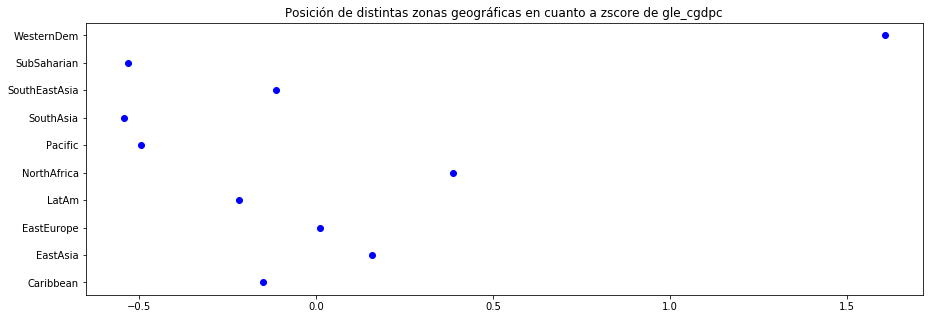

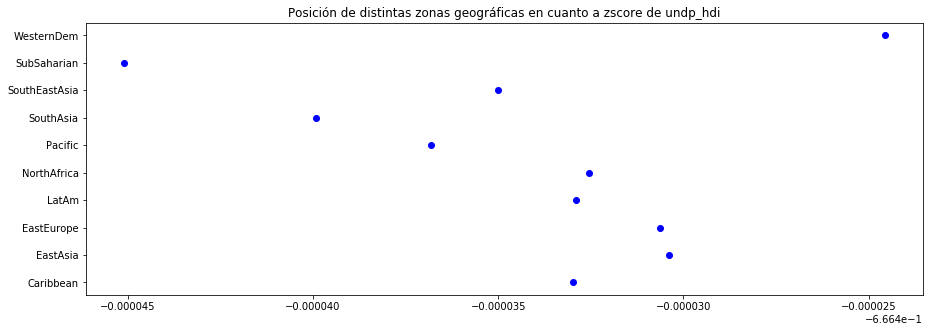

In [142]:
import matplotlib.pyplot as plt
def dotplot(dataframe, plot_var, plot_by, global_stat = False, statistic = 'mean'):
    """
    dotplot: Devuelve un dotplot
    @param dataframe: La tabla de datos donde buscar las variables.
    @param plot_var: La variable a analizar y extraer las medias.
    @param plot_by: La variable agrupadora.
    @param global_stat: Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False.
    @param statistic: Debe presentar tres opciones. mean para la media, median para la mediana y zscore para el puntaje z. Por defecto debe ser mean.
    """
    if statistic == 'mean':
        group_statistic = dataframe.groupby(plot_by)[plot_var].mean()
    elif statistic == 'median':
        group_statistic = dataframe.groupby(plot_by)[plot_var].median()
    else:
        # grafica zscore
        plot_var_dropna = dataframe[plot_var].dropna()
        plot_var_mean = plot_var_dropna.mean()
        plot_var_std = np.sqrt(plot_var_dropna.var())
        dataframe['z_' + plot_var] = (dataframe[plot_var] - mean) / std
        group_statistic = dataframe.groupby(plot_by)['z_' + plot_var].mean()
    
    plt.figure(figsize = (15, 5))
    plt.title('Posición de distintas zonas geográficas en cuanto a {} de {}'.format(statistic, plot_var))
    plt.plot(group_statistic.values, group_statistic.index, 'o', color = 'blue')
    
    if global_stat != False:
        plt.axvline(global_stat, color = 'tomato', linestyle = '--')
        
for plot_var in ['gle_cgdpc', 'undp_hdi']:
    plot_by = 'ht_region'
    global_stat = df[plot_var].dropna().mean()
    statistic = 'zscore'
    dotplot(df_sub, plot_var, plot_by, False, statistic)

## Desafío 5. Genere un método que devuelva un gráfico comparando dos curvas de densidad

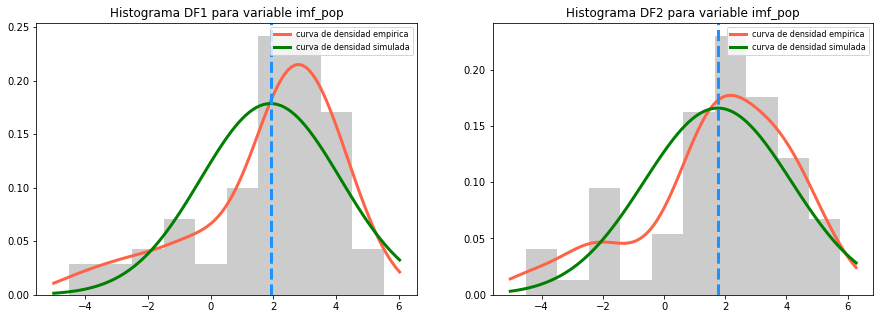

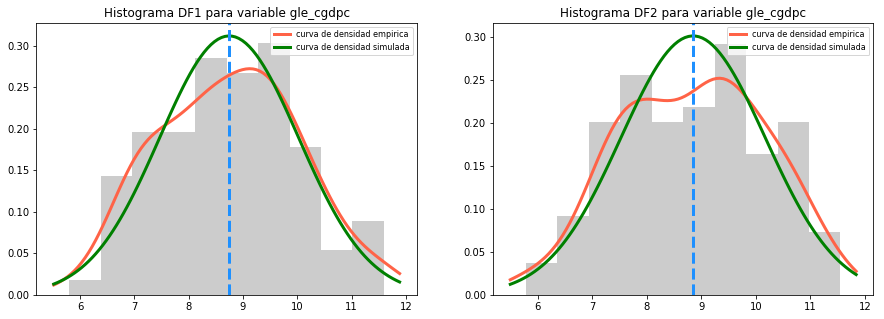

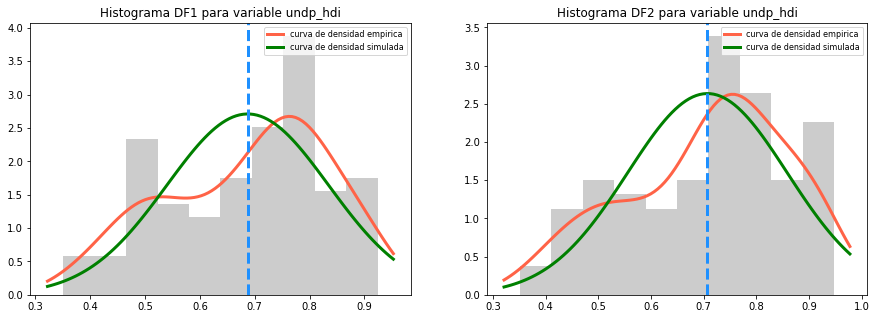

In [143]:
import scipy.stats as stats

def comparar(df1, df2, variable, log = False):
    """
    comparar: Grafica df1 y df2 para comparar curvas de densidad
    @param df1: Tabla de datos 1
    @param df2: Tabla de datos 2
    @param variable: Variable a contrastar
    @param log: Si es True transforma la variable al logaritmo. Por defecto debe ser False
    """
    if log == False:
        var_dropna1 = df1[variable].dropna()
        var_dropna2 = df2[variable].dropna()
    else:
        var_dropna1 = np.log(df1[variable].dropna())
        var_dropna2 = np.log(df2[variable].dropna())

    plt.figure(figsize = (15, 5))
    plt.subplot(1,2,1)
    plt.hist(var_dropna1, color='grey', alpha=.4, density=True)
    x_min, x_max = plt.xlim()
    x_axis = np.linspace(x_min, x_max, 100)
    gauss_kde = stats.gaussian_kde(var_dropna1)
    Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
    plt.plot(x_axis, Z, color='tomato', lw=3, label="curva de densidad empirica")
    plt.plot(x_axis, stats.norm.pdf(x_axis, var_dropna1.mean(), var_dropna1.std()), color='green', lw=3, label="curva de densidad simulada")
    plt.axvline(var_dropna1.mean(), color='dodgerblue', linestyle='--', lw=3)
    plt.title("Histograma DF1 para variable {}".format(variable))
    plt.legend(loc=1, fontsize = 8)

    plt.subplot(1, 2, 2)
    plt.hist(var_dropna2, color='grey', alpha=.4, density=True)
    x_min, x_max = plt.xlim()
    x_axis = np.linspace(x_min, x_max, 100)
    gauss_kde = stats.gaussian_kde(var_dropna2)
    Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
    plt.plot(x_axis, Z, color='tomato', lw=3, label="curva de densidad empirica")
    plt.plot(x_axis, stats.norm.pdf(x_axis, var_dropna2.mean(), var_dropna2.std()), color='green', lw=3, label="curva de densidad simulada")
    plt.axvline(var_dropna2.mean(), color='dodgerblue', linestyle='--', lw=3)
    plt.title("Histograma DF2 para variable {}".format(variable))
    plt.legend(loc=1, fontsize = 8)


my_df = pd.read_csv('subsample_javh_demo.csv')
comparar(my_df, df_sub, 'imf_pop', True)
comparar(my_df, df_sub, 'gle_cgdpc', True)
comparar(my_df, df_sub, 'undp_hdi', False)

### Es necesario utilizar logaritmo en las variables imf_pop y gle_cgdpc debido al alto sesgo que existe en la distribución de los datos, permitiendo reescalar los valores.